# Programming with Python

Derived from [Novice Python lesson using Python 2.7 - Copyright © Software Carpentry](https://github.com/swcarpentry/python-novice-inflammation-2.7) 

Programming is hard. Expectations & Takeaways


How many books about riding a bike did you read?

[What Riding A Bike Has To Do With Learning Programming](http://twonontechies.com/bicycles-can-help-you-learn-programming/)

> You can be a scientist in the science of bike ride mechanics and it still won’t help you one bit to do the actual thing.

The best way to learn how to program is to do something useful,
so this introduction to Python is built around a common scientific task:
data analysis.

Our real goal isn't to teach you Python,
but to teach you the basic concepts that all programming depends on.
We use Python in our lessons because:

1.  we have to use *something* for examples;
2.  it's free, well-documented, and runs almost everywhere;
3.  it has a large (and growing) user base among scientists; and
4.  experience shows that it's easier for novices to pick up than most other languages.

But the two most important things are
to use whatever language your colleagues are using,
so that you can share your work with them easily,
and to use that language *well*.

From the `bash` lesson, we've got a directory of bed files, that look something like this:

~~~
chr10	100023306	100023327	chr10:100023306-100023327(unannotated)	2	-	1.79	0.068	5
chr10	100057467	100057490	chr10:100057467-100057490(unannotated)	18	+	17.99	0.004	55
chr10	100082171	100082191	chr10:100082171-100082191(unannotated)	4	+	3.76	0.038	10
chr10	100155012	100155073	chr10:100155012-100155073(miRNA|processed_transcript|protein_coding)	78	-	78.44	0.001	636
~~~

Now, bash can glue commands together to do some basic operations on the data, but if we want to interpret the data more meaningfully (numerically, statistically, graphically), it's more appropriate to use a programming language like Python

We want to:

*   load that data into memory,
*   Analyze/summarize/subset the data
*   plot the result.

To do all that, we'll have to learn a little bit about programming.

## Prerequisites

Learners need to understand the concepts of files and directories
(including the working directory) and how to start the Jupyter Notebook
interpreter before tackling this lesson. This lesson references the Jupyter (IPython)
Notebook although it can be taught through any Python interpreter.
The commands in this lesson pertain to **Python 2**.

## Getting started

You need to download some files to follow this lesson:

1. Download [scicomp-python-1.0.0.zip](https://github.com/dleehr/scicomp-python/archive/v1.0.0.zip) and save it on your Desktop
2. If it's not unzipped yet, double-click on it to unzip it. You should end up with a new folder called `scicomp-python-1.0.0`.
3. Open a **bash** shell (Git Bash or Terminal)
4. Type `ipython notebook`
![bash ipython notebook](fig/bash-ipython-notebook.png)
5. Wait for a web browser to open, but do not close the bash window.
![jupyter home](fig/jupyter-notebook-start.png)

## Intro to Python & Notebook

1. Cells and the notebook toolbar
2. Simple arithmetic
3. Printing
4. Variables


In [1]:
5 + 3

8

In [2]:
print "Hello, World"

Hello, World


In [3]:
greeting = 'Aloha'
name = ''

print greeting, name

Aloha 


## Learning Objectives
*   Explain what a library is, and what libraries are used for.
*   Load a Python library and use the things it contains.
*   Read tabular data from a file into a program.
*   Assign values to variables.
*   Select individual values and subsections from data.
*   Perform operations on arrays of data.
*   Display simple graphs.

Words are useful,
but what's more useful are the sentences and stories we build with them.
Similarly,
while a lot of powerful tools are built into languages like Python,
even more live in the [libraries](reference.html#library) they are used to build.

In order to load data and analyze it,
we need to [import](reference.html#import) a library called pandas.
In general you should use this library if you want work with data like a spreadsheet.
Pandas works great with numerical and text data. There are other libraries for other purposes
We can load Pandas using:

In [4]:
import pandas

Importing a library is like getting a piece of lab equipment out of a storage locker
and setting it up on the bench. Libraries provide additional functionality to the basic Python package, much like a new piece of equipment adds functionality to a lab space.
Once you've loaded the library,
we can ask the library to read our data file for us:

In [35]:
pandas.read_table('data/A549.bed', header=None)

,0,1,2,3,4,5,6,7,8
0,chr10,100023307,100023327,chr10:100023307-100023327(unannotated),2,-,2.34,0.205,3
1,chr10,100082171,100082191,chr10:100082171-100082191(unannotated),5,-,4.69,0.138,6
2,chr10,100082171,100082191,chr10:100082171-100082191(unannotated),58,+,57.83,0.106,74
3,chr10,100152747,100152764,chr10:100152747-100152764(unannotated),6,+,5.52,0.120,6
4,chr10,100155026,100155049,chr10:100155026-100155049(miRNA|processed_tran...,1000,-,2744.14,0.007,4038


The expression `pandas.read_table(...)` is a [function call](reference.html#function-call)
that asks Python to run the function `read_table` that belongs to the `pandas` library.
This [dotted notation](reference.html#dotted-notation) is used everywhere in Python
to refer to the parts of things as `thing.component`.

`pandas.read_table` has three [parameters](reference.html#parameter):
the name of the file we want to read,
the [delimiter](reference.html#delimiter) that separates values on a line, and where our header row is.
The file name and delimiter need to be character strings (or [strings](reference.html#string) for short),
so we put them in quotes. The location of the header row would be a number, but we don't have a header row so we use the value `None`

When we are finished typing and press Shift+Enter,
the notebook runs our command.
Since we haven't told it to do anything else with the function's output,
the notebook displays it.
In this case,
that output is the data we just loaded.
By default,
only a few rows and columns are shown
(with `...` to omit elements when displaying big arrays).
To save space,

Our call to `pandas.read_table` read our file,
but didn't save the data in memory.
To do that,
we need to [assign](reference.html#assignment) the data frame to a [variable](reference.html#variable).
A variable is just a name for a value,
such as `x`, `current_temperature`, or `subject_id`.
Python's variables must begin with a letter and are [case sensitive](reference.html#case-sensitive).
We can create a new variable by assigning a value to it using `=`.
As an illustration,
let's step back and instead of considering a table of data,
consider the simplest "collection" of data,
a single value.
The line below assigns the value `55` to a variable `weight_kg`:

In [6]:
weight_kg = 55

Once a variable has a value, we can print it to the screen:

In [7]:
print weight_kg

55


and do arithmetic with it:

In [8]:
print 'weight in pounds:', 2.2 * weight_kg

weight in pounds: 121.0


We can also change a variable's value by assigning it a new one:

In [9]:
weight_kg = 57.5
print 'weight in kilograms is now:', weight_kg


weight in kilograms is now: 57.5


As the example above shows,
we can print several things at once by separating them with commas.

If we imagine the variable as a sticky note with a name written on it,
assignment is like putting the sticky note on a particular value:

![Variables as Sticky Notes](fig/python-sticky-note-variables-01.svg)

This means that assigning a value to one variable does *not* change the values of other variables.
For example,
let's store the subject's weight in pounds in a variable:

In [10]:
weight_lb = 2.2 * weight_kg
print 'weight in kilograms:', weight_kg, 'and in pounds:', weight_lb


weight in kilograms: 57.5 and in pounds: 126.5


![Creating Another Variable](fig/python-sticky-note-variables-02.svg)

and then change `weight_kg`:

In [11]:
weight_kg = 100.0
print 'weight in kilograms is now:', weight_kg, 'and weight in pounds is still:', weight_lb

weight in kilograms is now: 100.0 and weight in pounds is still: 126.5


![Updating a Variable](fig/python-sticky-note-variables-03.svg)

Since `weight_lb` doesn't "remember" where its value came from,
it isn't automatically updated when `weight_kg` changes.
This is different from the way spreadsheets work.

Just as we can assign a single value to a variable, we can also assign an array of values
to a variable using the same syntax.  Let's re-run `pandas.read_table` and save its result:

In [12]:
data = pandas.read_table('data/A549.bed', header=None)

This statement doesn't produce any output because assignment doesn't display anything.
If we want to check that our data has been loaded,
we can show or print the variable's value:

In [36]:
data

,chrom,chromStart,chromEnd,name,score,strand,level,signif,score2,chromSpan
0,chr10,100023307,100023327,chr10:100023307-100023327(unannotated),2,-,2.34,0.205,3,20
1,chr10,100082171,100082191,chr10:100082171-100082191(unannotated),5,-,4.69,0.138,6,20
2,chr10,100082171,100082191,chr10:100082171-100082191(unannotated),58,+,57.83,0.106,74,20
3,chr10,100152747,100152764,chr10:100152747-100152764(unannotated),6,+,5.52,0.120,6,17
4,chr10,100155026,100155049,chr10:100155026-100155049(miRNA|processed_tran...,1000,-,2744.14,0.007,4038,23


Now that our data is in memory,
we can start doing things with it.
First,
let's ask what [type](reference.html#type) of thing `data` refers to:

In [14]:
type(data)

pandas.core.frame.DataFrame

The output tells us that `data` currently refers to Data Frame created by the Pandas library. This contains the data from the `wgEncodeCshlShortRnaSeqA549CellContigs.bedRnaElements` file we saw earlier. The rows correspond to regions/features, and the columns contain things like the chromosome, location, and name. 

We can see what its [shape](reference.html#shape) is like this:

In [15]:
data.shape

(17813, 9)

This tells us that `data` has 17813 rows and 9 columns. When we created the
variable `data` to store our data, we didn't just create the Data Frame, we also
created information about the array, called [members](reference.html#member) or
attributes. This extra information describes `data` in
the same way an adjective describes a noun.
`data.shape` is an attribute  of `data` which described the dimensions of `data`.
We use the same dotted notation for the attributes of variables
that we use for the functions in libraries
because they have the same part-and-whole relationship.

If we want to get a single value from the Data Frame, we use square brackets and an attribute called `iloc`, which is short for integer location.

In [16]:
print 'first value in data:', data.iloc[0,0]
print 'middle value in data:', data.iloc[8906,4]

first value in data: chr10
middle value in data: 7


The expression `data.iloc[8906,4]` may not surprise you,
but `data.iloc[0,0]` might.

Programming languages like Fortran and MATLAB start counting at 1,
because that's what human beings have done for thousands of years.
Languages in the C family (including C++, Java, Perl, and Python) count from 0
because that's simpler for computers to do.

As a result,
if we have an M&times;N array in Python,
its indices go from 0 to M-1 on the first axis
and 0 to N-1 on the second.
It takes a bit of getting used to,
but one way to remember the rule is that
the index is how many steps we have to take from the start to get the item we want.

An index like `[8906, 4]` selects a single element of the Data Frame,
but we can select whole sections as well.
For example,
we can select the first three fields (columns) of values
for the first five regions (rows) like this:


In [17]:
data.iloc[0:4,0:2]

,0,1
0,chr10,100023307
1,chr10,100082171
2,chr10,100082171
3,chr10,100152747


The [slice](reference.html#slice) `0:4` means,
"Start at index 0 and go up to, but not including, index 4."
Again,
the up-to-but-not-including takes a bit of getting used to,
but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

We don't have to start slices at 0:

In [18]:
data.iloc[5:10, 2:4]

,2,3
5,100206783,chr10:100206760-100206783(unannotated)
6,100246555,chr10:100246530-100246555(unannotated)
7,1008291,chr10:1008275-1008291(unannotated)
8,101128622,chr10:101128603-101128622(unannotated)
9,101155409,chr10:101155393-101155409(unannotated)


We also don't have to include the upper and lower bound on the slice.
If we don't include the lower bound,
Python uses 0 by default;
if we don't include the upper,
the slice runs to the end of the axis,
and if we don't include either
(i.e., if we just use ':' on its own),
the slice includes everything:

In [19]:
small = data.iloc[:3, 7:]
print 'small is:', small

small is:        7   8
0  0.205   3
1  0.138   6
2  0.106  74


When we loaded the data frame, we said `headers=None` because our file didn't have a header row. If you have a CSV or TSV file with a header row, pandas will use that for your columns by default.

We can update this after the fact. by assigning a **list** of values to `data.columns`

These are `.bedRnaElements` files in the **ENCODE RNA elements** format. The columns, as documented at [ucsc.edu](https://genome.ucsc.edu/FAQ/FAQformat.html#format11) are:


1. **chrom** - Name of the chromosome (or contig, scaffold, etc.).
2. **chromStart** - The starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.
3. **chromEnd** - The ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the feature. For example, the first 100 bases of a chromosome are defined as chromStart=0, chromEnd=100, and span the bases numbered 0-99.
4. **name** - Name given to a region (preferably unique). Use '.' if no name is assigned.
5. **score** - Indicates how dark the peak will be displayed in the browser (0-1000). If all scores were '0' when the data were submitted to the DCC, the DCC assigned scores 1-1000 based on signal value. Ideally the average signalValue per base spread is between 100-1000.
6. **strand** - +/- to denote strand or orientation (whenever applicable). Use '.' if no orientation is assigned.
7. **level** - Expression level such as RPKM or FPKM.
8. **signif** - Statistical significance such as IDR.
9. **score2** - Additional measurement/count e.g. number of reads.

In [20]:
cols = ['chrom','chromStart','chromEnd','name','score','strand','level','signif','score2']
data.columns = cols

Looking at `data`, we see the meaningful labels at the top, and these labels follow the data through other operations. 

In [21]:
data.head()

,chrom,chromStart,chromEnd,name,score,strand,level,signif,score2
0,chr10,100023307,100023327,chr10:100023307-100023327(unannotated),2,-,2.34,0.205,3
1,chr10,100082171,100082191,chr10:100082171-100082191(unannotated),5,-,4.69,0.138,6
2,chr10,100082171,100082191,chr10:100082171-100082191(unannotated),58,+,57.83,0.106,74
3,chr10,100152747,100152764,chr10:100152747-100152764(unannotated),6,+,5.52,0.120,6
4,chr10,100155026,100155049,chr10:100155026-100155049(miRNA|processed_tran...,1000,-,2744.14,0.007,4038


Data Frames know how to do complex operations on their values, including basic statistics and arithmetic. We can ask the data frame for the mean value for each numeric column

In [22]:
data.mean()

chromStart    76298532.994723
chromEnd      76298568.245551
score               66.395554
level              705.733062
signif               0.154229
score2            3532.125751
dtype: float64

`mean` is a [method](reference.html#method) of the data frame,
i.e.,
a function that belongs to it
in the same way that the member `shape` does.
If variables are nouns, methods are verbs:
they are what the thing in question knows how to do.
We need empty parentheses for `data.mean()`,
even when we're not passing in any parameters,
to tell Python to go and do something for us. `data.shape` doesn't
need `()` because it is just a description but `data.mean()` requires the `()`
because it is an action.

Pandas data frames have lots of useful methods:

In [23]:
print '** maximum **\n', data.max(numeric_only=True), '\n'
print '** minimum **\n', data.min(numeric_only=True), '\n'
print '** standard deviation **\n', data.std()

** maximum **
chromStart    2.492006e+08
chromEnd      2.492007e+08
score         1.000000e+03
level         3.220229e+06
signif        4.800000e-01
score2        1.792414e+07
dtype: float64 

** minimum **
chromStart      0.00
chromEnd      131.00
score           0.00
level           0.26
signif          0.00
score2          2.00
dtype: float64 

** standard deviation **
chromStart    56853662.772984
chromEnd      56853659.838583
score              182.967235
level            26082.928803
signif               0.094065
score2          146115.671167
dtype: float64


But the one I use all the time is `data.describe()`. It provides summary statistics for all the numeric columns, makes it easy to spot NA/NaN/missing values, and give you a quick overview

In [24]:
data.describe()

,chromStart,chromEnd,score,level,signif,score2
count,1.781300e+04,1.781300e+04,17813.000000,17813.000000,17813.000000,17813.000000
mean,7.629853e+07,7.629857e+07,66.395554,705.733062,0.154229,3532.125751
std,5.685366e+07,5.685366e+07,182.967235,26082.928803,0.094065,146115.671167
min,0.000000e+00,1.310000e+02,0.000000,0.260000,0.000000,2.000000
25%,3.051529e+07,3.051532e+07,3.000000,3.320000,0.070000,5.000000
50%,6.388359e+07,6.388360e+07,11.000000,11.030000,0.164000,22.000000
75%,1.138683e+08,1.138684e+08,34.000000,33.670000,0.280000,60.000000
max,2.492006e+08,2.492007e+08,1000.000000,3220228.810000,0.480000,17924138.000000


When analyzing data, though,
we're often interested in specific columns like score. The `iloc` attribute works here too. But now that we have named columns, we can use `loc` instead of `iloc`, with the column names


In [25]:
scores = data.loc[:,['score']]
print 'Mean score:', scores.mean()

Mean score: score    66.395554
dtype: float64


We don't actually need to store the row in a variable of its own.
Instead, we can combine the selection and the method call:

In [26]:
print 'score std dev:', data.loc[:,['score']].std()[0]

score std dev: 182.96723548


Like a spreadsheet, data frames are editable. We can add new columns based on existing columns

In [27]:
data['chromSpan'] = data['chromEnd'] - data['chromStart']

In [28]:
data.describe()

,chromStart,chromEnd,score,level,signif,score2,chromSpan
count,1.781300e+04,1.781300e+04,17813.000000,17813.000000,17813.000000,17813.000000,17813.000000
mean,7.629853e+07,7.629857e+07,66.395554,705.733062,0.154229,3532.125751,35.250828
std,5.685366e+07,5.685366e+07,182.967235,26082.928803,0.094065,146115.671167,39.690362
min,0.000000e+00,1.310000e+02,0.000000,0.260000,0.000000,2.000000,16.000000
25%,3.051529e+07,3.051532e+07,3.000000,3.320000,0.070000,5.000000,19.000000
50%,6.388359e+07,6.388360e+07,11.000000,11.030000,0.164000,22.000000,23.000000
75%,1.138683e+08,1.138684e+08,34.000000,33.670000,0.280000,60.000000,34.000000
max,2.492006e+08,2.492007e+08,1000.000000,3220228.810000,0.480000,17924138.000000,1564.000000


75% of the span widths are below the mean of 35.25. Let's sort our data by the span width and see if there's anything interesting

In [37]:
data.sort('chromSpan', ascending=False)

,chrom,chromStart,chromEnd,name,score,strand,level,signif,score2,chromSpan
17060,chrM,1673,3237,chrM:1673-3237(unannotated),75,-,74.75,0.004,7480,1564
17029,chrM,11404,12391,chrM:11404-12391(Mt_tRNA|protein_coding),294,+,293.56,0.002,18537,987
17032,chrM,12397,13323,chrM:12397-13323(unannotated),125,-,125.38,0.004,7428,926
17056,chrM,15665,16548,chrM:15665-16548(Mt_tRNA),1000,-,1602.88,0.001,90551,883
17052,chrM,14812,15660,chrM:14812-15660(unannotated),666,-,665.56,0.001,36109,848


The top 12 are on **chrM** so that might be interesting

The mathematician Richard Hamming once said,
"The purpose of computing is insight, not numbers,"
and the best way to develop insight is often to visualize data.
Visualization deserves an entire lecture (or course) of its own,
and Pandas includes support for Python's `matplotlib` library.

While there is no "official" plotting library,
`matplotlib` package is the de facto standard.

Pandas makes it so easy to use that you can simply call the `.plot()` method on a data frame to get a plot

But first, **Magic**!

In [30]:
%matplotlib inline

The `%` indicates an IPython magic function -
a function that is only valid within the notebook environment.
Note that you only have to execute this function once per notebook.

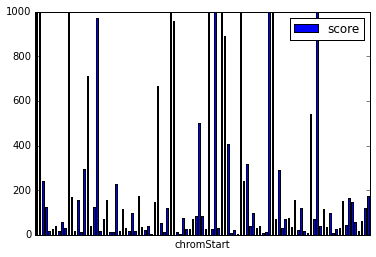

In [31]:
chrM = data.loc[data['chrom'] == 'chrM']
chrM.plot(kind='bar', y='score',x='chromStart', xticks=[])

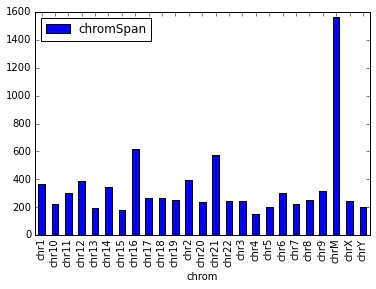

In [32]:
grouped = data.groupby('chrom')
grouped.max().plot(kind='bar',y='chromSpan')

## Scientists dislike typing

We will always use the syntax `import pandas` to import Pandas.
However, in order to save typing, it is
often suggested and seen
to make a shortcut like so: `import pandas as pd`.
If you ever see Python code online using a Pandas function with `pd`
(for example, `pd.read_table(...)`), it's because they've used this shortcut.

## Challenge: Check your understanding

Draw diagrams showing what variables refer to what values after each statement in the following program:

~~~ {.python}
mass = 47.5
age = 122
mass = mass * 2.0
age = age - 20
~~~

## Challenge: Sorting out references

What does the following program print out?

~~~ {.python}
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print third, fourth
~~~

## Challenge: Slicing strings

A section of a data frame is called a [slice](reference.html#slice).
We can take slices of character strings as well:

~~~ {.python}
element = 'oxygen'
print 'first three characters:', element[0:3]
print 'last three characters:', element[3:6]
~~~

~~~ {.output}
first three characters: oxy
last three characters: gen
~~~

What is the value of `element[:4]`?
What about `element[4:]`?
Or `element[:]`?

What is `element[-1]`?
What is `element[-2]`?
Given those answers,
explain what `element[1:-1]` does.

## Challenge: Thin slices

The expression `element[3:3]` produces an [empty string](reference.html#empty-string),
i.e., a string that contains no characters.
If `data` holds our data frame,
what does `data.iloc[3:3, 4:4]` produce?
What about `data.iloc[3:3, :]`?

## Challenge: Extended plotting

~~~
data.groupby('chrom').max().plot(kind='bar',y='chromSpan')
~~~
will produce a bar plot, showing the max `chromSpan` from each chromosome.
If `.max()` is the method decides how to aggregate the data,
what does `count()` tell us?

Does the plot look different if you use `count()` with `y='score'`?

What about `mean()`? Why?